<a href="https://colab.research.google.com/github/JFernandees/Data_science/blob/main/Case_Elo_group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de dados para a expansão estratégica de uma rede de laboratórios**

O mercado de medicina diagnóstica é um segmento em constante crescimento da indústria de saúde, que oferece serviços de diagnóstico e testes para pacientes e médicos. Esses serviços incluem uma ampla gama de exames de laboratório, testes de imagem, testes genéticos e testes de diagnóstico in vitro, que ajudam a identificar e diagnosticar doenças em pacientes. 

<center><img alt="Colaboratory logo" width="50%" src="https://img.freepik.com/vetores-gratis/medicos-e-analises-prescritivas-personalizadas_335657-1882.jpg?w=996&t=st=1679600253~exp=1679600853~hmac=d153092c815ffbe8596dd2bac6ff070dd25f94ceda3c4dc65e6eba42c18820ae"></center>

Com o avanço das tecnologias de diagnóstico e a crescente conscientização sobre saúde, o mercado de medicina diagnóstica tem experimentado um crescimento significativo nos últimos anos. Essa indústria desempenha um papel crítico no diagnóstico e tratamento de doenças em pacientes, permitindo que os médicos identifiquem e diagnostiquem doenças com maior precisão e eficácia, o que ajuda a melhorar a qualidade dos cuidados de saúde e a reduzir os custos associados ao tratamento. Este mercado é composto por uma variedade de empresas, incluindo grandes corporações globais e empresas locais menores que oferecem serviços personalizados. Este setor é fundamental para o avanço da saúde global e continuará a crescer e evoluir à medida que novas tecnologias de diagnóstico forem desenvolvidas e as demandas de pacientes e profissionais de saúde mudarem.

## **Importação dos pacotes e obtenção dos dados**
Inicialmente irei importa as blibiotecas que serão usadas neste projeto e em seguida importarei os dados.

In [ ]:
#Bibliotecas importadas

# Manipulação de dados 
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
import folium 


In [ ]:
# importação dos datasets para seus respectivos DataFrames
df_demo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /DemographicData_ZCTAs.csv', index_col=0)
df_eco = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /EconomicData_ZCTAs.csv', index_col=0)
df_geocod = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /df_geocode.csv', index_col=0)
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /test_data.csv')
df_tran = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados /transactional_data.csv', sep=';')

# **Análise Exploratória dos Dados**

Inicialmente a análise exploratória será realizada em duas etapas:
*  Limpeza e tratamentos dos dados.
*  Análise dos dados com objetivo de identificar os três melhores códigos postais para a instalação de novos laboratórios.


## **1 - Limpeza e tratamento dos dados**

Durante esta etapa, serão realizadas análises detalhadas a respeito da qualidade dos dados utilizados, com o intuito de garantir a integridade e confiabilidade das informações. Serão executados procedimentos que visam a remoção de informações duplicadas, correção de possíveis erros e inconsistências, identificação de valores faltantes ou inválidos e análise de possíveis outliers, que podem interferir na análise dos resultados.

In [ ]:
# Inicialmente irei verificar o tamanho do dataframe 
print(f"Quantidade de linhas: {df_demo.shape[0]}")
print(f"Quantidade de colunas: {df_demo.shape[1]}\n")
print('-'*50)

# Em seguida irei verificar o tipo dos dados
display(df_demo.dtypes)
print('-'*50)

# Por fim, darei uma olhada nas primeiras entradas do dataframe para ter uma ideia de como está os dados
df_demo.head()

# Realizarei o mesmo processo para o outros 4 dataframes

Quantidade de linhas: 33120
Quantidade de colunas: 18

--------------------------------------------------


Id                                  object
GeographicAreaName                  object
TotalPopulation                      int64
SexRatio(males per 100 females)    float64
Population_Under5Years               int64
Population_5to9Years                 int64
Population_10to14Years               int64
Population_15to19Years               int64
Population_20to24Years               int64
Population_25to34Years               int64
Population_35to44Years               int64
Population_45to54Years               int64
Population_55to59Years               int64
Population_60to64Years               int64
Population_65to74Years               int64
Population_75to84Years               int64
Population_85YearsAndOver            int64
MedianAgeInYears                   float64
dtype: object

--------------------------------------------------


,Id,GeographicAreaName,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6


In [ ]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_eco.shape[0]}')
print(f"Quantidade de colunas: {df_eco.shape[1]}\n")
print('-'*50)

# Tipo dos dados
display(df_eco.dtypes)
print('-'*50)

# Primeiras entradas do dataframe
df_eco.head()

Quantidade de linhas: 629280
Quantidade de colunas: 12

--------------------------------------------------


id                                    object
Geographic Area Name                  object
TotalHouseholds_LessThan$10.000        int64
TotalHouseholds_$10.000to$14.999       int64
TotalHouseholds_$15.000to$24.999       int64
TotalHouseholds_$25.000to$34.999       int64
TotalHouseholds_$35.000to$49.999       int64
TotalHouseholds_$50.000to$74.999       int64
TotalHouseholds_$75.000to$99.999       int64
TotalHouseholds_$100.000to$149.999     int64
TotalHouseholds_$150.000to$199.999     int64
TotalHouseholds_$200.000OrMore         int64
dtype: object

--------------------------------------------------


,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249


In [ ]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_geocod.shape[0]}')
print(f"Quantidade de colunas: {df_geocod.shape[1]}\n")
print('-'*40)

# Tipo dos dados
display(df_geocod.dtypes)
print('-'*40)

# Primeiras entradas do dataframe
df_geocod.head()

Quantidade de linhas: 119
Quantidade de colunas: 4

----------------------------------------


Lab Id       object
Address      object
Location     object
Zipcode     float64
dtype: object

----------------------------------------


,Lab Id,Address,Location,Zipcode
0,L152,"3800 PLEASANT HILL RD STE 1, DULUTH, GA 30096","34.000319,-84.1629724",30096.0
1,L520,"1614 N JAMES ST, ROME, NY 13440","43.2311327,-75.4445363",13440.0
2,L141,"12911 120TH AVE NE STE D60, KIRKLAND, WA 98034","47.7162786,-122.1838152",98034.0
3,L524,"5667 PEACHTREE DUNWOODY RD 250, ATLANTA, GA 30342","33.9093875,-84.3529096",30342.0
4,L545,"1204 IL HWY 164, OQUAWKA, IL 61469","40.9309925,-90.9437598",61469.0


In [ ]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_test.shape[0]}')
print(f"Quantidade de colunas: {df_test.shape[1]}\n")
print('-'*40)

# Tipo dos dados
display(df_test.dtypes)
print('-'*40)

# Primeiras entradas do dataframe
df_test.head()

Quantidade de linhas: 2002
Quantidade de colunas: 6

----------------------------------------


CodItem           int64
Desc Item        object
Category         object
Family           object
Speciality       object
Testing Cost    float64
dtype: object

----------------------------------------


,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02


In [ ]:
# Tamanho do dataframe
print(f'Quantidade de linhas: {df_tran.shape[0]}')
print(f"Quantidade de colunas: {df_tran.shape[1]}\n")
print('-'*40)

# Tipo dos dados
display(df_tran.dtypes)
print('-'*40)

# Primeiras entradas do dataframe
df_tran.head()

Quantidade de linhas: 2355241
Quantidade de colunas: 8

----------------------------------------


Patient Id         object
Gender             object
Date of birth      object
Date of service    object
Service Id         object
Lab Id             object
CodItem             int64
Testing Cost       object
dtype: object

----------------------------------------


,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost
0,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70003237,"9,0"
1,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000638,"13,0"
2,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70001597,"49,0"
3,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000103,"11,0"
4,10210830256-BIO003,F,01/08/1976 00:00:00,2019-01-07,571904533475-38,L133,70000224,"10,0"


Com base neste overview dos dados e dataframes, foi possível compreender de forma mais clara como as informações estão distribuídas em cada coluna. Além disso, constatou-se que alguns dados apresentam formatos incorretos, o que pode comprometer as análises posteriores.

Antes de realizar a conversão dos tipos de dados, será necessário analisar a presença de valores ausentes em cada dataframe, uma vez que isso pode afetar a forma como os dados serão tratados. A identificação e o tratamento adequado desses valores faltantes são fundamentais para garantir a integridade e a confiabilidade dos resultados obtidos. Dessa forma, essa análise preliminar se faz necessária para minimizar possíveis impactos e erros na conversão dos tipos de dados e na qualidade geral das análises realizadas.

### 1.1 - Analíse dos Valores ausentes

Para dar início à etapa de análise de dados ausentes, será calculada a porcentagem de valores faltantes em cada dataframe. Essa análise é fundamental para entender a magnitude e a distribuição desses valores ausentes e, assim, determinar a melhor estratégia de tratamento a ser adotada.

MedianAgeInYears                   1.717995
SexRatio(males per 100 females)    1.509662
Population_35to44Years             0.000000
Population_85YearsAndOver          0.000000
Population_75to84Years             0.000000
Population_65to74Years             0.000000
Population_60to64Years             0.000000
Population_55to59Years             0.000000
Population_45to54Years             0.000000
Id                                 0.000000
GeographicAreaName                 0.000000
Population_20to24Years             0.000000
Population_15to19Years             0.000000
Population_10to14Years             0.000000
Population_5to9Years               0.000000
Population_Under5Years             0.000000
TotalPopulation                    0.000000
Population_25to34Years             0.000000
dtype: float64

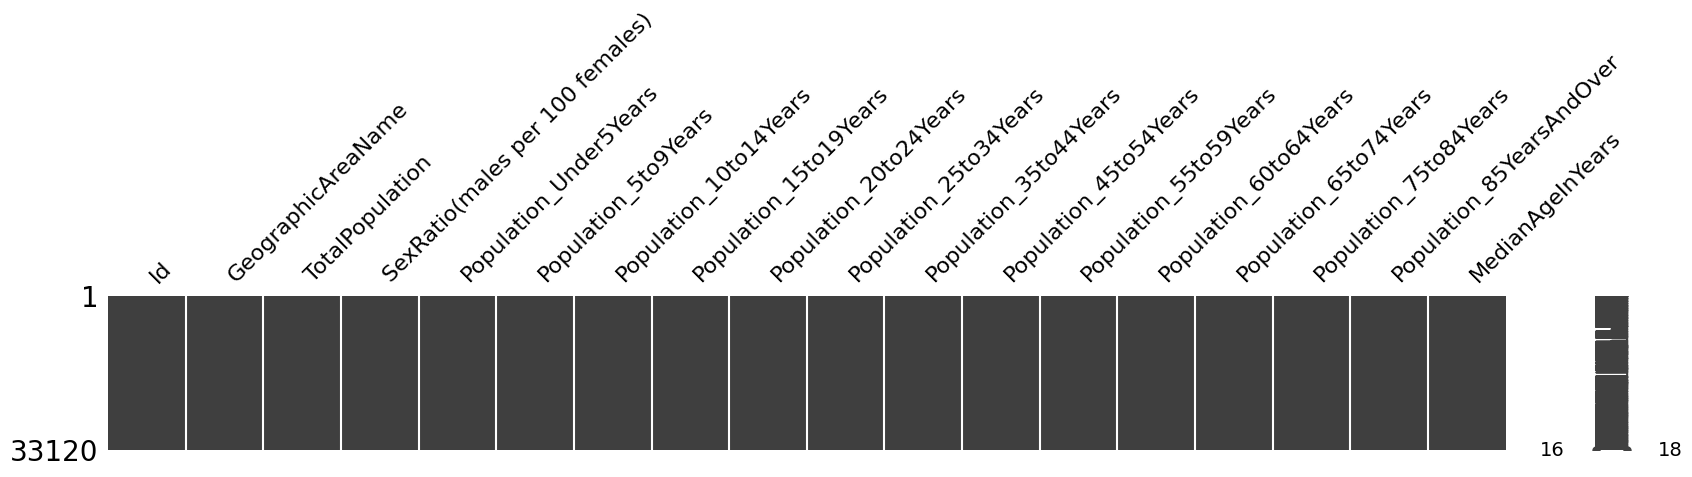

In [ ]:
# Irei plotar um grafico para mostrar se existe valores ausentes e como eles estão destribuidos ao longo do dataframe 
msno.matrix(df_demo, figsize = (20,2));

# Calculo da porcentagem de valores ausentes 
(df_demo.isnull().sum() / df_demo.shape[0] * 100).sort_values(ascending=False)

# Realizarei o mesmo processo para o outros 4 dataframes

id                                    0.0
Geographic Area Name                  0.0
TotalHouseholds_LessThan$10.000       0.0
TotalHouseholds_$10.000to$14.999      0.0
TotalHouseholds_$15.000to$24.999      0.0
TotalHouseholds_$25.000to$34.999      0.0
TotalHouseholds_$35.000to$49.999      0.0
TotalHouseholds_$50.000to$74.999      0.0
TotalHouseholds_$75.000to$99.999      0.0
TotalHouseholds_$100.000to$149.999    0.0
TotalHouseholds_$150.000to$199.999    0.0
TotalHouseholds_$200.000OrMore        0.0
dtype: float64

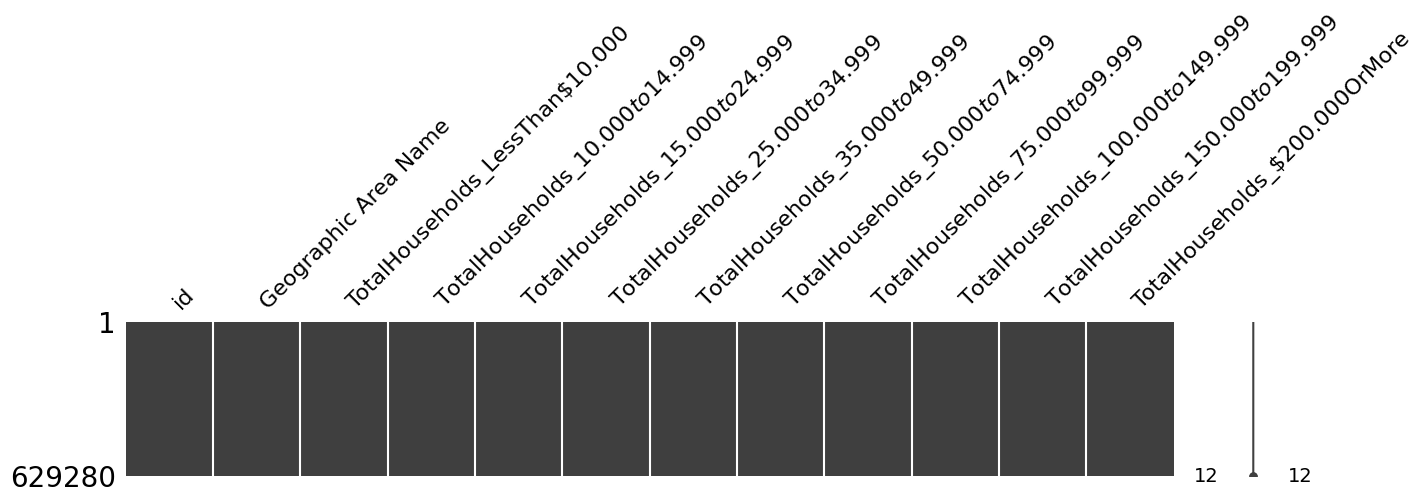

In [ ]:
# Grafico de valores ausentes
msno.matrix(df_eco, figsize = (15,2));

# Calculo da porcentagem de valores ausentes 
(df_eco.isnull().sum() / df_eco.shape[0] * 100).sort_values(ascending=False)

Zipcode     0.840336
Lab Id      0.000000
Address     0.000000
Location    0.000000
dtype: float64

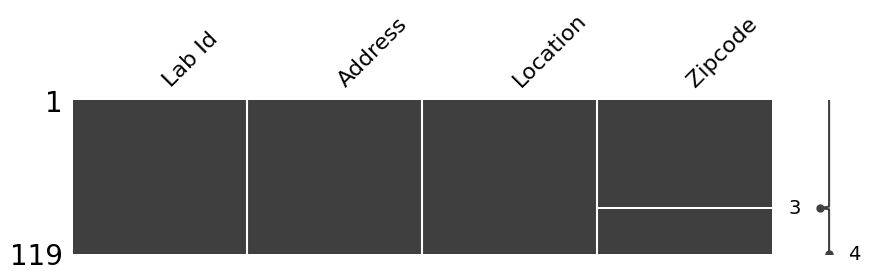

In [ ]:
# Grafico de valores ausentes
msno.matrix(df_geocod, figsize = (10,2));

# Calculo da porcentagem de valores ausentes 
(df_geocod.isnull().sum() / df_geocod.shape[0] * 100).sort_values(ascending=False)

CodItem         0.0
Desc Item       0.0
Category        0.0
Family          0.0
Speciality      0.0
Testing Cost    0.0
dtype: float64

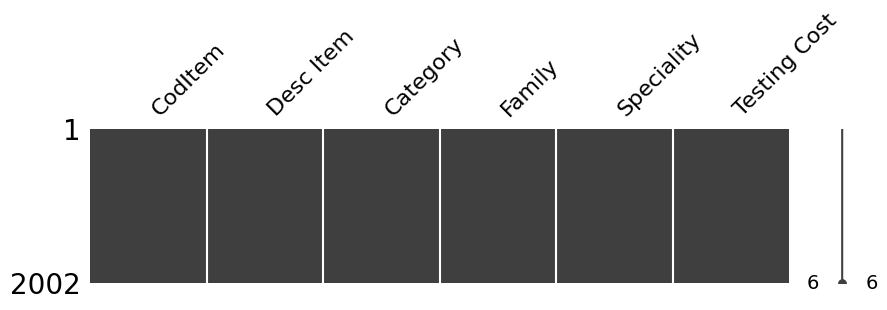

In [ ]:
# Grafico de valores ausentes
msno.matrix(df_test, figsize = (10,2));

# Calculo da porcentagem de valores ausentes 
(df_test.isnull().sum() / df_test.shape[0] * 100).sort_values(ascending=False)

Date of birth      0.000042
Patient Id         0.000000
Gender             0.000000
Date of service    0.000000
Service Id         0.000000
Lab Id             0.000000
CodItem            0.000000
Testing Cost       0.000000
dtype: float64

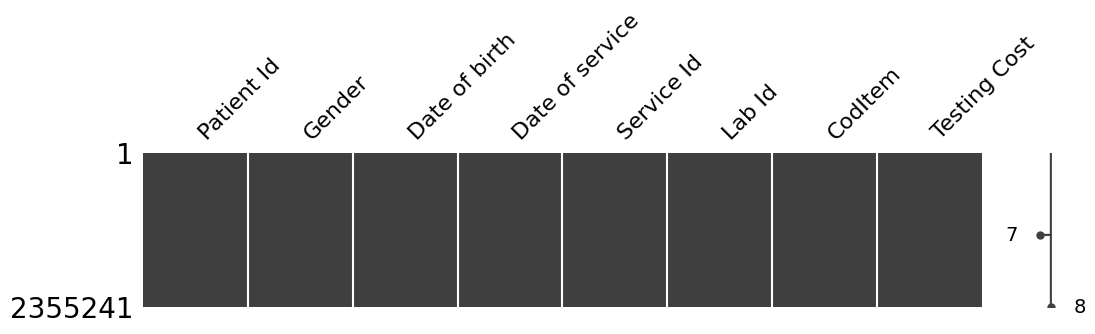

In [ ]:
# Grafico de valores ausentes
msno.matrix(df_tran, figsize = (12,2));

# Calculo da porcentagem de valores ausentes 
(df_tran.isnull().sum() / df_tran.shape[0] * 100).sort_values(ascending=False)

#### 1.1.1 - Tratando os dados ausentes

Foi possível observar a presença de valores ausentes em três dos cinco dataframes analisados, onde:

*  No dataframe `df_demo`, foram identificadas duas colunas com valores ausentes, que representam no máximo `1,7%` do dataframe cada. Para tratar esses valores faltantes, optou-se por substituí-los pelas respectivas medianas das colunas, assim para que não haja nenhuma perca de informação. Essa estratégia é comumente utilizada para tratar valores ausentes em variáveis numéricas, uma vez que preserva as características centrais da distribuição dos dados e minimiza o impacto dos valores faltantes nas análises realizadas.

* No dataframe `df_geocod`, foi identificada a presença de valores ausentes apenas na coluna Zipcode, representando uma porcentagem pequena de `0,84%` do dataframe. Dessa forma, optou-se por remover esses dados ausentes, uma vez que não devem afetar significativamente a análise exploratória realizada.

*   No dataframe `df_tran`, foi identificada a presença de valores ausentes apenas na coluna Date of birth, representando uma porcentagem insignificante do dataframe. Dessa forma, optou-se por remover esses dados ausentes, uma vez que não afetam significativamente a análise exploratória a ser realizada.

In [ ]:
# Substituindo os valores ausentes pela mediana 
df_demo['SexRatio(males per 100 females)'].fillna(df_demo['SexRatio(males per 100 females)'].median(), inplace=True)
df_demo['MedianAgeInYears'].fillna(df_demo['MedianAgeInYears'].median(), inplace=True)

In [ ]:
# Removendo os valores ausentes dos 2 dataframes abaixo
df_geocod.dropna(inplace=True)
df_tran.dropna(inplace=True)

Agora que finalizamos o tratamento dos dados ausentes, podemos dar início à análise dos tipos de dados presentes em cada dataframe, com o objetivo de verificar se estão coerentes e realizar as conversões necessárias para otimizar a análise exploratória dos dados.

### 1.2 - Convertendo o tipo dos dados

Conforme observado anteriormente, foi constatado que alguns dados apresentam formatos incorretos, portanto, será necessário realizar alteração nos tipos de alguns dados, conforme abaixo:

*   A coluna `Location` deve ser convertida para `float64`
*   A coluna `Zipcode` deve ser convertida para `int64`
*   As colunas `Date of birth` e `Date of service`devem ser convertida para o formato correto de data`datetime64`
*   A coluna `Testing Cost` deve ser convertida para `float64`

Vale ressaltar, que também será necessário na coluna `Testing Cost` trocar a "," por "." que é o padrão do python para valores decimais. E também irei dividir a coluna `Location` em duas novas colunas `latitude` e `longitude` para facilitar futuras análises permitindo uma visualização mais clara e precisa das informações geográficas presentes no dataset.

In [ ]:
# 1 - Inicialmente irei separar a coluna "Location" em "latitude" e "longitude" e em seguida converte as novas colunas para float64
df_geocod[['Latitude', 'Longitude']] = df_geocod['Location'].str.split(',', 1, expand=True)

# Agora irei converte as novas colunas para float
df_geocod[['Latitude','Longitude']] = df_geocod[['Latitude','Longitude']].astype('float64')

In [ ]:
# 2 - Convertendo "Zipcode" para int64
df_geocod['Zipcode'] = df_geocod['Zipcode'].astype('int64')

In [ ]:
# 3 - Convertendo "Date of birth" e "Date of service" para datetime64
df_tran['Date of birth'] = pd.to_datetime(df_tran['Date of birth'], format='%d/%m/%Y %X')
df_tran['Date of service'] = pd.to_datetime(df_tran['Date of service'])

In [ ]:
# 4 - Convertendo "Testing Cost" para float64 e susbtituindo , por .
df_tran['Testing Cost'] = df_tran['Testing Cost'].str.replace(',','.').astype('float64')


### 1.3 - Analisando valores Duplicados

Será realizada a análise e remoção de valores duplicados, uma etapa crucial da análise exploratória de dados, pois a presença desses valores pode afetar negativamente a precisão e confiabilidade das análises, além de gerar redundâncias e informações desnecessárias no conjunto de dados.

In [ ]:
# Irei calcular a quantidade de valores duplicados em cada dataframee
print('O dataframe demo possui {} valores duplicados\n'.format(df_demo['Id'].duplicated().sum()))
print('O dataframe eco possui {} valores duplicados\n'.format(df_eco['id'].duplicated().sum()))
print('O dataframe geocod possui {} valores duplicados\n'.format(df_geocod['Lab Id'].duplicated().sum()))
print('O dataframe test possui {} valores duplicados\n'.format(df_test['CodItem'].duplicated().sum()))
print('O dataframe tran possui {} valores duplicados\n'.format(df_tran['Patient Id'].duplicated().sum()))

O dataframe demo possui 0 valores duplicados

O dataframe eco possui 596160 valores duplicados

O dataframe geocod possui 0 valores duplicados

O dataframe test possui 1 valores duplicados

O dataframe tran possui 1853795 valores duplicados



Como observado anteriormente, três dataframes apresentaram valores duplicados. Entretanto, no caso do dataframe `tran`, não será necessário remover os valores duplicados, já que esse dataframe contém informações de clientes e dos exames realizados por eles, logo, um mesmo cliente pode realizar mais de um exame.

Para os outros dois dataframes, iniciarei o processo de remoção desses valores duplicados.

In [ ]:
# Removendo valores Duplicados
df_eco.drop_duplicates(subset=['id'], inplace=True)
df_test.drop_duplicates(subset=['CodItem'], inplace=True)

### 1.4 - Analise de Outliers

Esta etapa de análise de outliers tem como objetivo identificar valores extremos que se diferenciam do padrão da distribuição dos dados. Esses valores podem ser resultado de erros de medição ou representar situações reais e significativas que merecem atenção especial.

In [ ]:
# Irei analisar as variaveis numericas, para observar se a algum outlier ou outras inconformidades.
df_demo.describe()

,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
count,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000
mean,9903.343961,116.563859,601.164674,613.889312,637.866304,646.958333,671.606220,1371.989463,1249.675604,1283.429499,660.344807,613.378502,902.903895,458.470954,191.666395,42.687249
std,14714.043400,1471.923831,995.953840,995.199535,1025.828850,1050.850817,1236.614357,2326.202024,1993.925809,1925.116570,939.240835,857.368028,1269.069622,681.297975,312.549075,9.027850
min,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.900000
25%,705.750000,91.500000,31.000000,34.000000,37.000000,37.000000,30.000000,66.000000,70.000000,85.000000,52.000000,51.000000,78.000000,37.000000,10.000000,37.200000
50%,2801.000000,98.400000,146.000000,159.000000,173.500000,171.000000,149.000000,298.000000,313.500000,367.000000,211.000000,202.000000,303.000000,151.000000,51.000000,42.000000
75%,13475.250000,107.700000,744.000000,782.000000,816.250000,820.000000,782.250000,1612.000000,1593.000000,1727.250000,921.250000,867.000000,1266.000000,624.000000,242.000000,47.500000
max,128294.000000,265600.000000,17564.000000,14784.000000,12289.000000,13357.000000,23027.000000,28192.000000,23166.000000,18058.000000,7392.000000,7018.000000,26465.000000,16934.000000,4633.000000,98.200000


In [ ]:
df_eco.describe()

,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
count,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000,33120.000000
mean,230.234903,160.920380,331.454771,330.243810,451.798581,631.313194,465.690791,553.135386,247.101238,280.055707
std,441.473859,276.897093,520.925224,503.574323,673.915058,927.028673,696.960873,888.380820,469.374301,684.816325
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,9.000000,25.000000,25.000000,36.000000,49.000000,31.000000,29.000000,6.000000,3.000000
50%,55.000000,45.000000,98.000000,100.000000,139.000000,195.000000,137.000000,135.000000,40.000000,29.000000
75%,257.000000,188.000000,415.000000,416.000000,578.000000,831.000000,611.000000,681.250000,254.000000,202.000000
max,7901.000000,3942.000000,5410.000000,4349.000000,5988.000000,8466.000000,6491.000000,8705.000000,6095.000000,11968.000000


In [ ]:
df_geocod.describe()

,Zipcode,Latitude,Longitude
count,118.000000,118.000000,118.000000
mean,47422.305085,40.714606,-93.092078
std,37504.806583,4.343482,20.877090
min,1605.000000,33.449801,-122.687053
25%,13440.250000,37.932059,-121.895358
50%,30244.000000,40.837855,-84.391353
75%,94545.250000,43.058613,-75.175614
max,98383.000000,47.804487,-70.766752


In [ ]:
df_test.describe()

,CodItem,Testing Cost
count,2.001000e+03,2001.000000
mean,7.000366e+07,77.624928
std,2.266616e+03,145.963584
min,7.000004e+07,0.000000
25%,7.000166e+07,4.810000
50%,7.000358e+07,21.140000
75%,7.000534e+07,78.970000
max,7.000900e+07,1762.460000


In [ ]:
df_tran.describe()

,CodItem,Testing Cost
count,2.355240e+06,2.355240e+06
mean,7.000321e+07,5.112760e+01
std,1.911431e+03,9.783096e+01
min,7.000004e+07,0.000000e+00
25%,7.000112e+07,1.100000e+01
50%,7.000376e+07,2.400000e+01
75%,7.000446e+07,4.900000e+01
max,7.000900e+07,9.500000e+03


Em relação aos outliers, como observado acima nos valores máximos das colunas numéricas de todos os dataframes, pode-se notar valores discrepantes. No entanto, após uma análise desses valores, conclui-se que esses valores não são provenientes de erros de amostragem ou de entrada de dados incorretos. Por exemplo, a média de idade de `98 anos` não é um erro de digitação, mas sim resultado de um `Zipcode` em que a população possui apenas 17 pessoas, sendo 11 delas com idade acima de 85 anos. Da mesma forma, a venda de um exame por `9500` não é um erro de digitação, mas sim resultado de um exame caro e que foi realizado apenas em três vezes no dataframe.

Por conta desses motivos, decidiu-se, a princípio, não deletar esses outliers, uma vez que isso poderia resultar em perda de informações importantes. No entanto, para lidar com esses valores em futuras análises, irei filtrar e segmentar os dados, de forma a minimizar a influência desses valores discrepantes. Dessa forma, será possível realizar análises mais precisas e obter resultados mais confiáveis.

Porém quando olhamos para as colunas `Testing Cost` dos dataframe`df_test` e `df_tran` vemos valores mínimos de 0, que talvez possam ser erro na entrada de dados, por que não faz sentido o valor para produzir um exame ser 0 e para vende-lo ser 0 também. Por isso irei deletar esses ``valores = 0`` da das colunas `Testing Cost`.

In [ ]:
# Deletando os valores = 0 da coluna "Testing Cost"
df_test.drop(df_test[df_test["Testing Cost"] == 0].index, inplace=True)
df_tran.drop(df_tran[df_tran["Testing Cost"] == 0].index, inplace=True)

### 1.5 - Padronizar colunas texto

Irei padronizar o formato do texto das colunas dos dataframe ``df_demo`` e ``df_eco``, para caso eu necessite fazer uma junção de ambos dataframe futuramente, não ocorra nenhum problema.

In [ ]:
# Irei retirar todos espaços em branco das colunas e colocar a primeira letra em maiusculo e o resto em minusculo
df_demo = df_demo.rename(columns=lambda x: x.strip().replace(' ', '').capitalize())
df_eco = df_eco.rename(columns=lambda x: x.strip().replace(' ', '').capitalize())

## **2 - Análise dos dados**

Para iniciar a análise com o objetivo de resolver o problema de negócio, é necessário examinar os seguintes tópicos nos dados:

*  Qual gênero é mais propenso a realizar exames?
*  Qual faixa etária é mais propensa a realizar exames?
*  Quais os tipos de exames mais realizados?
*  Tamanho populacional e classe economica influencia na demanda por serviços diagnósticos?
*  Em quais zipcode estão os laboratórios?
*  Quais as características dos laboratórios com maiores lucros?


Para realizar essas análises, criarei um novo dataframe que reúna os dados dos 5 dataframes, a fim de ter todas as informações necessárias para responder os tópicos acima em um único dataframe. Abaixo, descreverei o processo que seguirei:

*   Inicialmente, criarei uma nova coluna no `df_eco` que retornará o valor médio anual de salário da população por zipcode. Para isso, usarei o cálculo da `Média Aritmética para Dados Agrupados por Intervalo`. Como o último intervalo de renda era de 200.000 ou mais, irei adotar que seria de 200.000 a 300.000 para poder realizar o cálculo. Portanto, os resultados dessa nova coluna serão valores aproximados da realidade, logo, nos darão uma boa base na análise da renda. Abaixo, segue um exemplo do cálculo realizado que foi realizado.

<center><img alt="Colaboratory logo" width="50%" src="  https://slideplayer.com.br/slide/11572125/41/images/7/M%C3%A9dia+Aritm%C3%A9tica+para+Intervalos+de+Classes+%E2%80%93+Exemplo.jpg"></center>

* Em seguida irei juntar o `df_demo` e `df_eco` pelo `Id`, assim criando uma novo dataframe. E neste novo dataframe irei dividir a coluna ´Geographicareaname_x´ em duas novas colunas `Cod` e `Zipcode` para assim conseguir juntar esse dataframe com os demais pelo `Zipcode`

*  Em seguida irei juntar o novo dataframe `df_juncao1` com os `df_tran`, `df_test` e `df_geocod`. Após essa nova junção irei criar duas novas colunas que ajudarão nas analises, uma mostrando a idade dos pacientes `Age` e a outra mostrando o lucro por cada exame feito `Profit`.

*  Por fim, criarei um último dataframe contendo todas as colunas necessárias para análise das perguntas mencionadas acima.

Conforme será realizado nos códigos a seguir:

In [ ]:
# Criando uma coluna "Averageincome" que contem valor de salario anual medio da população por zipcod no dataframe "df_eco"


p = 0
j = 0
t = 0
o = list(range(33120))
r_list = []
valor = [5000, 12500, 20000,30000,42500,62500,87500,125000, 175000,250000]
columns = ["Totalhouseholds_lessthan$10.000","Totalhouseholds_$10.000to$14.999","Totalhouseholds_$15.000to$24.999","Totalhouseholds_$25.000to$34.999",
           "Totalhouseholds_$35.000to$49.999","Totalhouseholds_$50.000to$74.999","Totalhouseholds_$75.000to$99.999","Totalhouseholds_$100.000to$149.999",
           'Totalhouseholds_$150.000to$199.999',"Totalhouseholds_$200.000ormore"]

# primeiro "for" para percorrer todo datafame           
for g in o:
  # segundo "for" para somar todos valores da lista "columns" por linha do dataframe
  for i in columns:
    a = df_eco[i].loc[g]
    #print(a)
    p += a

  # Terceiro 'for' para aplicar a multiplicação dos pesos pelos valores das linhas
  for col, var in zip(columns, valor):
    a = df_eco[col].loc[g]
    v = a * var
    t += v
    #print(t)
 
 # Calculo da media (r) e em seguida adicionando um valores a uma lista(r_list) e adicionando ao dataframe
  r = t/p
  r_list.append(r)
  #print(r)
  t = 0
  p = 0
df_eco['Averageincome'] = r_list

<ipython-input-28-7319163ba32f>:30: RuntimeWarning: invalid value encountered in long_scalars
  r = t/p


In [ ]:
# Juntando os dataframes "df_demo" e "df_eco" em um dataframe só
df_juncao1 = pd.merge(df_demo, df_eco, on='Id')

# Dividindo a coluna 'Geographicareaname_x' em duas novas colunas e mudando o tipo delas para inteiro
df_juncao1[['Cod','Zipcode']] = df_juncao1['Geographicareaname_x'].str.split(' ', 1, expand=True)
df_juncao1[['Zipcode',"Totalpopulation"]] = df_juncao1[['Zipcode',"Totalpopulation"]].astype(int)


In [ ]:
#Juntando os 4 dataframes em 1
df_juncao2 = pd.merge(pd.merge(pd.merge(df_tran, df_test, on='CodItem'), df_geocod, on = 'Lab Id'), df_juncao1, on='Zipcode').copy()

In [ ]:
#Criando 2 novas colunas 'Age' e 'Profit'
df_juncao2['Age'] = ((df_juncao2['Date of service'] - df_juncao2['Date of birth']).dt.days / 365.25).astype(int)
df_juncao2['Profit'] = df_juncao2['Testing Cost_x'] - df_juncao2['Testing Cost_y']

#Criando um novo dataframe com apenas as colunas que me serão util nas analises 
df_a = df_juncao2[["Patient Id","Gender","Age","CodItem",'Date of service',"Desc Item","Testing Cost_x","Profit","Lab Id","Latitude","Longitude","Zipcode","Totalpopulation","Averageincome"]].copy()

# Renomeando a coluna "testing_cost"
df_a.rename(columns={'Testing Cost_x':'Sale price'}, inplace=True)

In [ ]:
# Visualização das primeiras entradas do novo dataframe
df_a.head()

,Patient Id,Gender,Age,CodItem,Date of service,Desc Item,Sale price,Profit,Lab Id,Latitude,Longitude,Zipcode,Totalpopulation,Averageincome
0,10210830256-BIO003,F,42,70003237,2019-01-07,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",9.0,7.22,L133,38.007001,-121.868574,94565,97671,87176.836576
1,10210832620-BIO003,F,60,70003237,2019-01-10,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",9.0,7.22,L133,38.007001,-121.868574,94565,97671,87176.836576
2,10210794117-BIO003,F,47,70003237,2019-03-22,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",9.0,7.22,L133,38.007001,-121.868574,94565,97671,87176.836576
3,569400020478-BIO003,F,44,70003237,2019-03-15,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",9.0,7.22,L133,38.007001,-121.868574,94565,97671,87176.836576
4,10210451017-BIO003,F,22,70003237,2019-01-20,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",9.0,7.22,L133,38.007001,-121.868574,94565,97671,87176.836576


Pronto, agora com o novo dataframe criado, será possivel iniciar a análise dos tópicos mencionados acima.

### 2.1 - Qual gênero é mais propenso a realizar exames?

Essa analise é importante, porque nos da uma ideia se há uma diferença entre a frequência de visitas de homens e mulheres. Caso haja, podemos escolher os zipcodes com base em regiões onde possuem mais mulheres ou homens.

In [ ]:
# Irei calcular a quantidade de exames realizados por Gender M ou F, desconsiderando o 'I', por conta que para a analise de SexRatio, não seria util e por aprensentar apenas 8 no data frame
df_a[df_a['Gender'] != 'I']['Gender'].value_counts()

F    1430183
M     822267
Name: Gender, dtype: int64

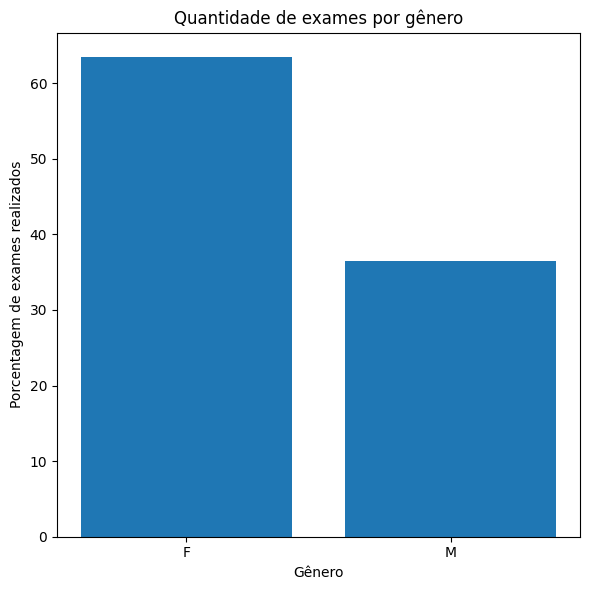

In [ ]:
# Irei plotar um gráfico de barras para representar melhor esses dados em porcentagem

# Criando a figura e o objeto axes
fig, ax = plt.subplots(figsize = (6,6))

# Plotando um grafico de barras
ax.bar('index', 'Gender',data=(df_a[df_a['Gender'] != 'I']['Gender'].value_counts() / df_a['Gender'].shape[0] * 100).reset_index())

# Configurando o título e os rótulos dos eixos
ax.set_xlabel('Gênero')
ax.set_ylabel("Porcentagem de exames realizados")
ax.set_title("Quantidade de exames por gênero")

# Exibir o gráfico
fig.tight_layout()

Portanto, podemos concluir que as mulheres são mais propensas a realizar exames, com quase o dobro de exames realizados em comparação com os homens. 

Com isso, você pode priorizar a seleção de `Zipcodes` com uma maior taxa de mulheres para maximizar a realização de exames.

### 2.2 - Qual faixa etária é mais propensa a realizar exames?

Essa análise é importante porque pode responder se a idade dos clientes influencia na quantidade de exames realizados, o que pode auxiliar na criação de estratégias de marketing e fidelização de clientes. Além disso, também podemos segmentar os zipcodes por faixa etária, o que pode ser útil para ações de marketing mais específicas e eficazes.


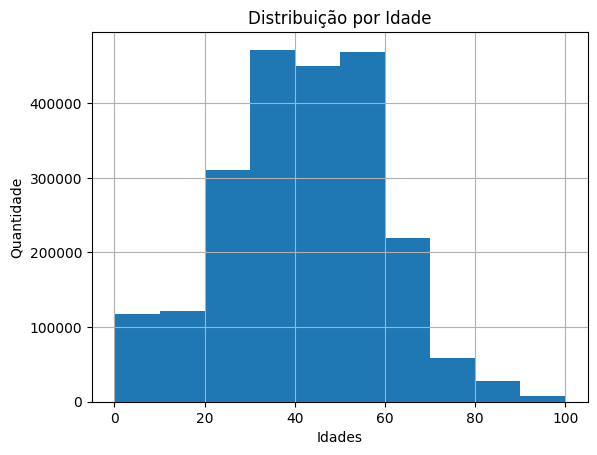

In [ ]:
# Para essa analise irei só analisar as idades menores que 100 anos, porque idades acima disso possa ser algum erro nos dados

# Criação de um dataframe com idade filtrada
df1 = df_a[df_a['Age'] <= 100]

# Criando a figura e o objeto axes
fig, ax = plt.subplots()

# Plotando as barras horizontais
df1['Age'].hist()

# Configurando o título e os rótulos dos eixos
ax.set_title('Distribuição por Idade')
ax.set_xlabel('Idades')
ax.set_ylabel('Quantidade')

# Exibir o gráfico
plt.show()

Portanto, com o gráfico acima, podemos concluir que a maioria dos exames foram realizados por pessoas com faixa etária entre 35 e 60 anos. A partir dessa informação, podemos segmentar os dados de Zipcodes em regiões com média de idade dentro dessa faixa etária para uma análise mais específica.

### 2.3 - Quais os tipos de exames mais realizados?
Essa análise é importante para entender quais exames são mais procurados pelos clientes e também para ter uma ideia dos seus valores.

In [ ]:
# irei agrupar os dados por item e preço e calcular a quantidade de vezes que o exame foi realizado
df_a.groupby(['Desc Item','Sale price'])['Patient Id'].count().sort_values(ascending=False).reset_index()[:20]

# A coluna "Patient id" mostra a quantidade de exames realizados 

,Desc Item,Sale price,Patient Id
0,"HEMOGRAMA, AUTOMATIZADO, SANGUE",13.0,159659
1,"GLICOSE, SORO/PLASMA (EXEMPLO DE EXPRESSAO DE ...",10.0,113092
2,"TIREOESTIMULANTE, HORMONIO (TSH), ULTRA SENSIV...",31.0,77625
3,"ROTINA DE URINA (CARACTERES FISICOS, ELEMENTOS...",13.0,75598
4,"UREIA, SORO (EXEMPLO DE EXPRESSAO DE RESULTADO...",9.0,68700
5,"TRANSAMINASE GLUTAMICA PIRUVICA (TGP), SORO",9.0,67142
6,"GONADOTROFINA CORIONICA (BETA HCG), DOSAGEM, SORO",36.0,67107
7,"TRANSAMINASE GLUTAMICA OXALACETICA (TGO), SORO",10.0,66297
8,"TIROXINA LIVRE - T4 LIVRE, SORO",39.0,57812
9,"CREATININA, SORO (EXEMPLO DE EXPRESSAO DE RESU...",10.0,56650


Com uma análise rápida do gráfico acima, podemos concluir que os 20 exames mais realizados possuem um custo baixo, o que significa que pessoas com uma renda familiar menor têm maior probabilidade de realizar esses exames por causa do preço acessível. Isso indica que não apenas famílias com maior poder aquisitivo têm acesso aos exames, mas também aquelas com menor poder aquisitivo.


Uma análise adicional que poderia ser realizada seria analisar quais exames são feitos por pacientes com doenças crônicas, como diabetes, hipertensão ou doenças cardíacas, que precisam fazer exames regulares para monitorar sua saúde, portanto, com essa analise poderiamos escolher zipcodes com uma maior proporção de pessoas com doenças crônicas. Para isso, seria necessário realizar uma pesquisa sobre quais exames são recomendados para cada doença crônica e utilizar o novo dataframe criado para analisar a frequência desses exames e investigar, se essa realmente é uma boa análise com base nas frenquência desses exames. No entanto, essa análise exigiria mais tempo e dados sobre doenças crônicas por zip code, a fim de selecionar os melhores zip codes com base nesta análise.



###2.4 - Tamanho populacional e classe economica influencia na demanda por serviços diagnósticos?

Irei analisar se o tamanho populacional e a classe econômica dos zipcodes se correlacionam com o lucro dos laboratórios.

Com base nas seguintes hipoteses:

*   O número total de habitantes em cada código postal pode ajudar a identificar áreas com maior concentração de pessoas, o que pode indicar maior demanda por serviços de diagnóstico?


*   Com a análise da renda média dos zip codes, podemos identificar quais áreas possuem maior poder aquisitivo, o que pode indicar uma maior disposição para gastar em serviços de diagnóstico.?



In [ ]:
#Criação do df que some o lucro por Lab id
aa = df_a.groupby(['Lab Id','Totalpopulation','Latitude','Longitude','Zipcode','Averageincome'])['Profit'].sum().sort_values(ascending=False)
dff = aa.reset_index()

# Primeiras entradas do Df
dff.head()

# Criação do df que some a quantidade de exames por Total de população
bb = df_a.groupby(['Totalpopulation'])['Patient Id'].count().sort_values(ascending=False).reset_index()

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


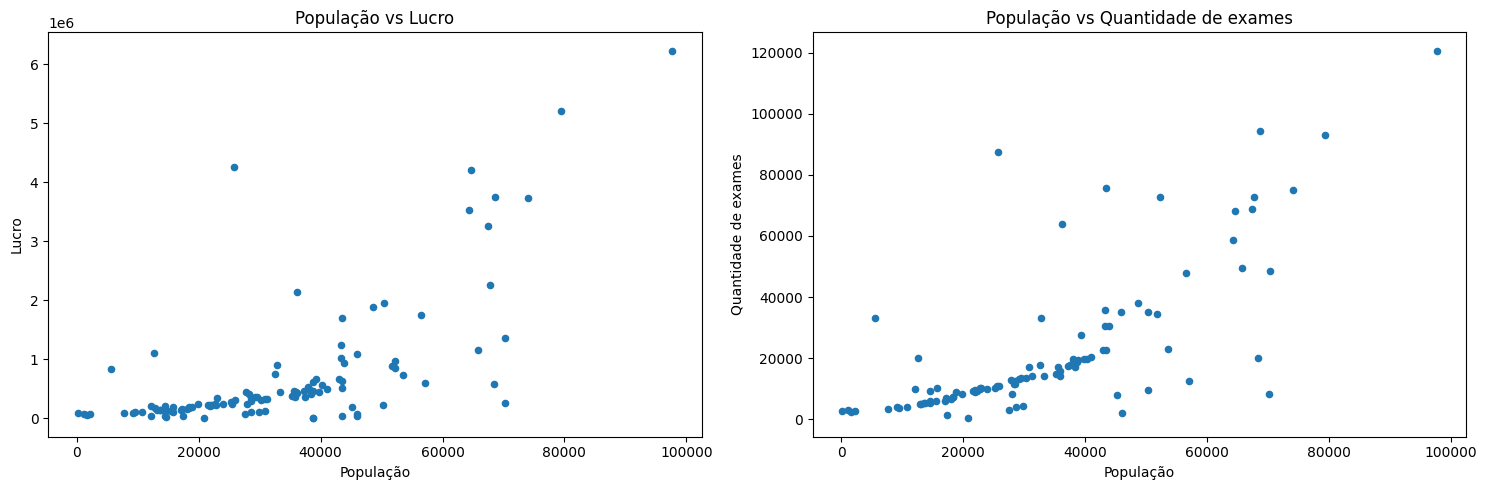

In [ ]:
# Plotarei 2 gráficos para descobri se a correlação entre essas variaveis
fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols= 2, figsize = (15,5))

# Criando o scatter Totalpopulation vs Profit
dff.plot.scatter(x='Totalpopulation', y='Profit', ax=ax1 , s=20, alpha=1)
ax1.set_title('População vs Lucro')
ax1.set_xlabel('População')
ax1.set_ylabel('Lucro')


# Criando o scatter Totalpopulation vs Quantidade de exames
bb.plot.scatter(x='Totalpopulation', y='Patient Id', ax=ax2 , s=20, alpha=1)
ax2.set_title('População vs Quantidade de exames')
ax2.set_xlabel('População')
ax2.set_ylabel('Quantidade de exames')


# Exibir o gráfico
fig.tight_layout()

Pode-se notar que a partir de uma população de 40000, há um aumento expressivo na quantidade de exames realizados e lucro.

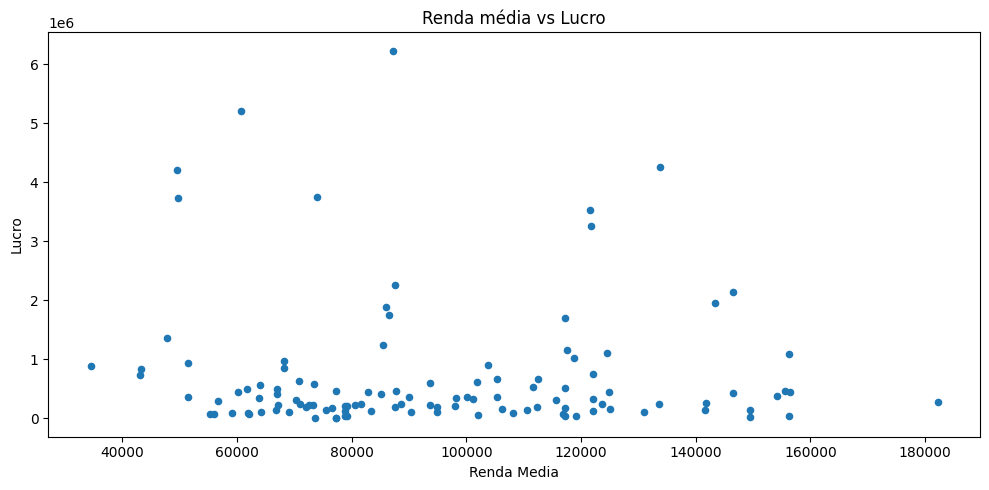

In [ ]:
# Irei plotar um gráfico Averageincome vs Profit, para descobri se a correlação entre essas variaveis.
fig, ax = plt.subplots(figsize = (10,5))

# Criando o scatter
dff.plot.scatter(x='Averageincome', y='Profit', ax=ax , s=20, alpha=1)

# Configurando o título e os rótulos dos eixos
ax.set_title('Renda média vs Lucro')
ax.set_xlabel('Renda Media')
ax.set_ylabel('Lucro')

# Exibir o gráfico
fig.tight_layout()

Portanto, ao analisarmos os gráficos de dispersão, podemos concluir que há uma tendência de que quanto maior a população, maior será o lucro e a demanda por exames no zip code.

Além disso, nota-se que não há correlação entre a renda média da população e o lucro dos laboratórios. Isso ocorre porque, como comentado nas análises anteriores, os exames mais realizados têm um custo baixo, tornando-os mais acessíveis para a maioria da população. Dessa forma, a renda média não afeta significativamente a realização de exames.

### 2.5 - Em quais zipcode estão os laboratórios?

Analisar a quantidade de laboratórios em cada zipcode pode ser útil para identificar áreas onde a concorrência é menor e, portanto, onde há maior potencial para a laboratório de medicina diagnóstica ganhar participação de mercado.

In [ ]:
# Irei analisar a quantidade maxima de laboratorios por zipcode
dff.groupby(['Zipcode'])['Lab Id'].nunique().sort_values(ascending=False)[:15]

Zipcode
94520    3
98034    3
19148    2
94566    2
98148    2
98004    2
30342    2
98104    2
3087     2
13413    2
61201    1
61265    1
61282    1
52807    1
61469    1
Name: Lab Id, dtype: int64

Podemos observar que a maioria dos Zipcodes possui apenas um laboratório e o máximo de 3 laboratórios por zipcode. Com isso, a análise indica que seria mais estratégico priorizar a seleção de zipcodes que ainda não possuem laboratórios.

Para melhor visualização, podemos plotar um mapa com a localização dos laboratórios identificados pela coluna ``Lab Id``.

In [ ]:
# criando as variáveis necessárias
latitude = dff.Latitude.values
longitude = dff.Longitude.values
listings = dff['Lab Id'].values

# criando o mapa
nyc = folium.Map(location=[42.4902057,-99.0751851],
                 zoom_start=5)

# adicionando os marcadores
for lat, lon, listing in zip(latitude, longitude, listings):
    folium.Marker(location=[float(lat), float(lon)], popup=listing).add_to(nyc)

    
# plotando o mapa
nyc.save('nyc_map.html')
nyc

Ao analisar o mapa, podemos concluir que os laboratórios estão concentrados em alguns estados, como Washington, Califórnia, Nova York, entre outros. Isso significa que vários estados não possuem laboratórios, tornando-se uma oportunidade de negócio para expansão da rede. Dessa forma, seria mais interessante priorizar estados que não possuem nenhum laboratório e caso não seja possível o melhor seria priorizar zipcodes que não possuam nenhum laboratório,assim, dando prioridade a regiões sem concorrência e com potencial para investimento.

Quais seriam as caracterias dos lab com maior lucro?

###  2.6 - Quais as características dos laboratórios com maiores lucros?

Este é um processo importante para validar as análises realizadas até o momento e verificar se elas são consistentes com a situação atual dos laboratórios existentes. 

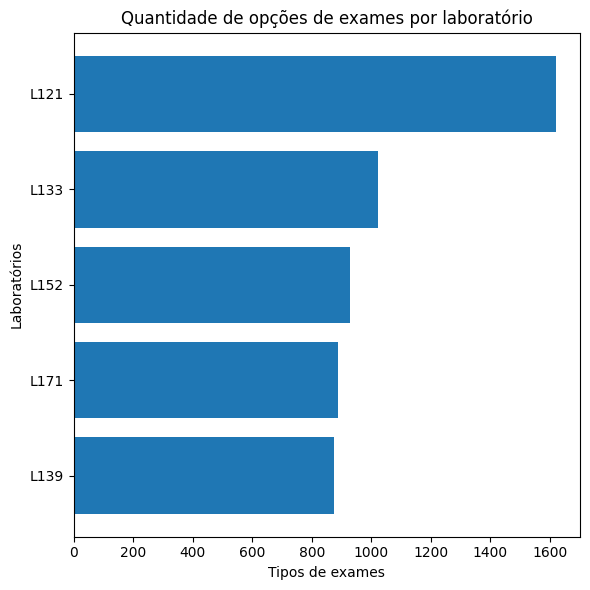

In [ ]:
# Criação de um grafico que mostre os 5 lab com maiores opções de exames


#criando dataframe com os dados especificos
dd = df_a.groupby(['Lab Id'])['CodItem'].nunique().sort_values(ascending=False)[:5].reset_index()
dd = dd.sort_values('CodItem',ascending=True)

# Criando a figura e o objeto axes
fig, ax = plt.subplots(figsize = (6,6))

# Plotando um grafico de barras
ax.barh('Lab Id', 'CodItem',data=(dd))

# Configurando o título e os rótulos dos eixos
ax.set_xlabel('Tipos de exames')
ax.set_ylabel("Laboratórios")
ax.set_title("Quantidade de opções de exames por laboratório")

# Exibir o gráfico
fig.tight_layout()

In [ ]:
# Analisando os laboratórios 10 com maiores lucros
df_a.groupby(['Lab Id','Totalpopulation','Averageincome','Gender'])['Profit'].sum().sort_values(ascending=False)[:10].reset_index()

,Lab Id,Totalpopulation,Averageincome,Gender,Profit
0,L133,97671,87176.836576,F,3880193.51
1,L139,79440,60688.000844,F,3061803.64
2,L123,64630,49459.704406,F,2783160.46
3,L121,25719,133706.348351,F,2752535.05
4,L152,68691,74034.946757,F,2436267.47
5,L133,97671,87176.836576,M,2350273.10
6,L166,74060,49636.383024,F,2239367.93
7,L155,64313,121582.527791,F,2234031.30
8,L139,79440,60688.000844,M,2154438.99
9,L156,67427,121716.881135,F,2028308.57


Ao analisar o gráfico e a tabela acima, pode-se notar que dos 5 laboratórios com maior número de opções de exames, 4 estão entre os 10 laboratórios com maior lucro. Isso sugere uma correlação positiva entre a variedade de exames oferecidos e o sucesso financeiro do laboratório. É possível inferir que quanto mais opções de exames um laboratório oferece, maior o público que o laboratório atinge e, consequentemente, maior o lucro.

Além disso, é possível perceber que minhas suposições e conclusões estavam corretas, já que ao segmentar os 10 laboratórios com mais lucros pela coluna ``Gender``, a maioria do lucro foi obtida por clientes do sexo feminino, o total de população por zipcode está acima de 40000 como notamos antes e, por fim, a média salarial não parece ser um fator decisivo.

Isso confirma a importância de considerar essas variáveis ao selecionar novos locais para laboratórios de medicina diagnóstica, visando maximizar o potencial de lucro e atender à demanda do público feminino, que tende a realizar mais exames.

### 2.7 - Quais os melhores zipcode para a instalação do laboratório?

Agora irei iniciar a analisar para recomendar os 3 melhores zipcode para se abrir uma clinica de medicina diagnosticas, conforme os observaçãoes obtidos, que foram:

*   Mulheres são mais propensas a realizar exames diagnósticos, por isso, pretendo priorizar os zipcodes com taxas mais altas de mulheres. Estabelecerei um limite de sex ratio (número de homens por cada 100 mulheres) máximo de 80, dessa forma, dando prioridade a zipcodes com uma proporção maior de mulheres.

*   A maioria dos exames foi realizada por pessoas com idade entre 35 e 60 anos. Portanto, vamos priorizar os zipcodes com a `Medianageinyears` nessa faixa etária.

*   Como observado anteriormente, há uma tendência de que quanto maior a população por zipcode, maior seja a quantidade de exames realizados e o lucro gerado para os laboratórios. Portanto, vamos priorizar zipcodes que possuam uma população acima de 40.000 habitantes.

*   Como observado, irei priorizar zipcode que ainda não tenha nenhum laboratório, porque possui um maior potencial para a empresa de medicina diagnóstica ganhar participação de mercado.

Portanto, inicialmente irei analisar os zipcodes levando em consideração as observações feitas anteriormente.



Como a classe econômica não influencia no lucro dos laboratórios, vou utilizar apenas o dataframe `df_demo` para realizar a análise.

In [ ]:
# Irei realizar filtros no df 
res = df_demo.loc[(df_demo['Sexratio(malesper100females)'] <= 80) & (df_demo['Totalpopulation'] >= 40000) & (df_demo['Medianageinyears'] >= 35) & (df_demo['Medianageinyears'] <= 60)]
print(f'Um total de {res.shape[0]} zipcodes se encaixaram dentro das condições estabelecidas\n')

#mostrando os dados que se encaixaram dentro dos filtros
res.sort_values('Totalpopulation', ascending=False)

Um total de 15 zipcodes se encaixaram dentro das condições estabelecidas



,Id,Geographicareaname,Totalpopulation,Sexratio(malesper100females),Population_under5years,Population_5to9years,Population_10to14years,Population_15to19years,Population_20to24years,Population_25to34years,Population_35to44years,Population_45to54years,Population_55to59years,Population_60to64years,Population_65to74years,Population_75to84years,Population_85yearsandover,Medianageinyears
19116,8600000US11236,ZCTA5 11236,100844,77.0,6536,6041,6345,6291,6669,14685,13065,13066,7392,6854,8652,3721,1527,38.0
19088,8600000US11207,ZCTA5 11207,91083,79.8,6141,5698,5754,5308,6901,15499,12018,11793,5687,5200,6182,3396,1506,35.2
19084,8600000US11203,ZCTA5 11203,76085,79.9,4314,4529,4296,4293,4670,10917,9555,9031,5668,4919,7457,4803,1633,40.2
19093,8600000US11212,ZCTA5 11212,75605,71.2,4663,3939,5227,4301,4716,12050,10081,10616,5099,4142,6507,3099,1165,38.3
18913,8600000US10466,ZCTA5 10466,75039,79.7,4803,4106,4935,5347,6170,10489,9396,10073,5236,4463,5927,3039,1055,36.6
5743,8600000US30331,ZCTA5 30331,66658,77.4,4733,4790,4745,4207,4150,9850,8258,9838,3669,3212,5426,3030,750,36.4
18836,8600000US10023,ZCTA5 10023,62541,78.7,3230,2221,1908,2134,2438,11048,10002,7598,4037,3800,8051,3991,2083,43.3
18864,8600000US10128,ZCTA5 10128,58636,75.0,3030,2015,1941,1896,3019,13678,7853,7795,2797,3549,5926,3541,1596,39.3
12409,8600000US21215,ZCTA5 21215,58283,77.6,3572,3371,3454,2923,3624,7717,5726,7407,4213,4247,6180,3861,1988,42.5
18837,8600000US10024,ZCTA5 10024,58102,78.6,3400,2742,2313,1681,1389,9910,8625,8187,4022,3869,7002,3063,1899,43.7


Desses 15 zipcodes encontrados, que se encaixaram nas minhas hipoteses, irei selecionar 3 deles para a recomendação. 

Como uma grande parte desses 15 zipcodes possuem os dígitos iniciais de `New York (10 ou 11)`, irei escolher apenas 1 zipcode de New York que possua a maior `Medianageinyears`, assim diversificando as opções de zipcodes e não concentrando as recomendações em apenas 1 estado. Os outros 2 irei escolher dos zipcodes restante por ordem de maior `Medianageinyears` e que estejam localizados na América do Norte.

Portanto os 3 zipcodes selecionados que satisfazem essas condições são `ZCTA5 10475`, `ZCTA5 21215`e `ZCTA5 60649`. Em seguida, irei plotar um mapa contendo os laboratórios do dataframe em cor vermelha e os 3 zipcodes recomendados em cor azul.

In [ ]:
# criando as variáveis necessárias
latitude = dff.Latitude.values
longitude = dff.Longitude.values
listings = dff['Lab Id'].values

#encontrados 
latitudef = [	40.869530000,39.345550000,	41.763030000]
longitudef = [-73.825320000,-76.683690000,	-87.570360000]
listingsf = ['ZCTA5 10475','ZCTA5 21215','ZCTA5 60649']


# criando o mapa
nyc = folium.Map(location=[41.4493954,-96.273921],
                 zoom_start=5)

# adicionando os marcadores
for lat, lon, listing in zip(latitude, longitude, listings):
    folium.Marker(location=[float(lat), float(lon)], popup=listing, icon=folium.Icon(color='red')).add_to(nyc)

for lat, lon, listing in zip(latitudef, longitudef, listingsf):
    folium.Marker(location=[float(lat), float(lon)], popup=listing, icon=folium.Icon(color='blue')).add_to(nyc)

# plotando o mapa
nyc.save('nyc_map.html')
nyc

Ao observar o mapa, notasse que os Zip code selecionados, não possuiam nenhum laboratoria da rede, assim satisfazendo o criterio de apenas 1 laboratorio por Zip code.

## 3 - Conclusão

Portanto, com base nesta analise exploratoria concluisse que o total populacional, gênero e faixa etaria  são fatores decisivos para a escolha de Zip codes onde os laboratorios terão suas melhores perfomances. Com, base nestes fatores e entre outros, foram selecionados 3 Zip codes para a
instalação dos novos laboratórios da rede em estados distintos, para ter opções mais diversificadas, os zip codes escolhidos foram `ZCTA5 10475`, `ZCTA5 21215`e `ZCTA5 60649`


limitações


recomendações

### dale

In [ ]:
# Quantidade de dias diferentes que um paciente foi a clinica fazer algum exame
cc = df_a.groupby(['Patient Id','Lab Id','Age'])['Date of service'].nunique().sort_values(ascending=False).reset_index()
#cc.head(10)
cc['Date of service'].mean()

# essas foram as variaveis para escolher melhor zipcode, porem para resolver problema de criar clientes fiesi poderiamos analisar esses graficos

1.168871202676748

In [ ]:
cc['Patient Id'].value_counts()[:10]

7657786278-1    24
9999999-1        8
2587417310-1     7
7658741382-1     7
7660568069-1     7
7661812501-1     6
6174760922-1     6
7659208140-1     6
7661364185-1     5
7659498822-1     5
Name: Patient Id, dtype: int64

In [ ]:
# analsie de quantidades de tipo de exames, tentar fidelizar clientes 
cc.loc[cc['Patient Id'] == '9999999-1']

,Patient Id,Lab Id,Date of service
36,9999999-1,L121,22
59789,9999999-1,L172,2
59790,9999999-1,L171,2
198418,9999999-1,L533,1
198419,9999999-1,L503,1
198420,9999999-1,L139,1
198421,9999999-1,L066,1
521245,9999999-1,L535,1
